# One vs All Classification

Previously we explained how to use logistic regression to solve binary classification problems. However, we can employ a clever strategy to solve multiclass classification problems as well.

We said that logistic regression gives us a probability that a given example is from class *A*, and taking the inverse of that as class *B*. In order to do classification for $N$ classes, we will take $N$ outputs from our logistic regression, where each output gives us the probability that a given example is from the $N_i$-th class. Essentially, each output will be a *test* of whether a given example belongs to *one* category, hence the name **One vs All**.

Programmatically, we can implement this in the following way:

# Example

Given the following data points:

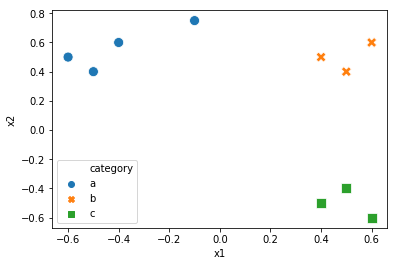

In [90]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

CATMAP = {0: 'a', 1: 'b', 2: 'c'}

data = pd.DataFrame()
data['x1'] = [-0.1, -0.5, -0.4, -0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.6 ]
data['x2'] = [0.75, 0.4, 0.6, 0.5, 0.4, 0.5, 0.6, -0.4, -0.5, -0.6 ]
data['y'] = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2]
data['category'] = data['y'].map(CATMAP)

sns.scatterplot(data=data, x='x1', y='x2', hue='category', style='category', s=100)

Performing multiple logistic regression yields the following:

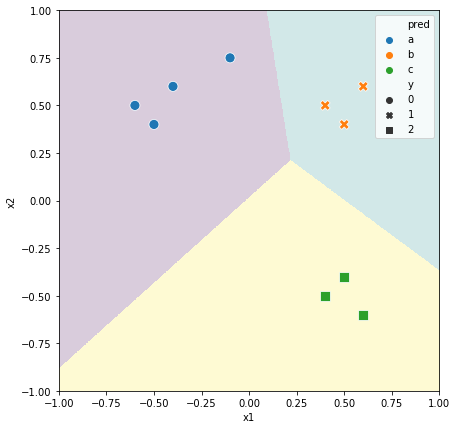

In [202]:
def h(X, theta):
    return 1 / (1 + np.exp(-X @ theta))

def dJ(X, Y, theta):
    return X.T @ (h(X, theta) - Y)

def J(X, Y, theta):
    p = h(X, theta)
    c = Y * np.log(p) + (1 - Y)*np.log(1 - p)
    return -np.sum(c, axis=0) / X.shape[1]

N = 10
data['x0'] = np.ones(N)
X = data[['x0', 'x1', 'x2']].to_numpy()
Y = data['y'].to_numpy()
Y = np.stack([np.ones(N) * (Y == 0), np.ones(N) * (Y == 1), np.ones(N) * (Y == 2)]).T

alpha = 1
theta = np.array([[0, 1, -1], [0, 1, -1], [0, 1, -1]])
I = 1000
for i in range(I):
    theta = theta - alpha * dJ(X, Y, theta)

fig,ax = plt.subplots(1, 1, figsize=(10, 7))

M = 1000
ext = np.linspace(-1, 1, M)
xx,yy = np.meshgrid(ext, ext)
space = np.stack([np.ones((M, M)), yy, xx]).T
pred = h(space, theta)
predictions = np.argmax(pred, axis=2)
ax.imshow(predictions,  extent=(-1, 1, -1, 1), alpha=.2, origin='lower', aspect='equal')

predData = h(X, theta)
data['pred'] = np.argmax(predData, axis=1)
data['pred'] = data['pred'].map(CATMAP)
ax = sns.scatterplot(data=data, x='x1', y='x2', hue='pred', style='y', s=100)